In [1]:
from statistics import mean
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker
import json
import os
import numpy as np
from collections import defaultdict
from scipy.interpolate import make_interp_spline

In [19]:
ont = "case-uco-owl-trafficking"
depth = 8
ont_label = "CASE"
colour = "coral"
temps = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
llm_name = "llama3-8B"

In [20]:
base_results_dir = f"/home/upal/Projects/onto-pop-temp-var-exp/code/results/{llm_name}/{ont}"

In [21]:
results = defaultdict(list)

In [22]:
for temp in temps:
    for run in os.listdir(os.path.join(base_results_dir, f"t{temp}")):
        with open(os.path.join(base_results_dir, f"t{temp}", run, "pred_metrics.json"), "r") as f:
            metrics = json.load(f)
        results[temp].append(metrics[f"map_{depth}"])
        

In [23]:
results

defaultdict(list,
            {0.0: [0.5835424084998583,
              0.5503965375212585,
              0.5635264978387188,
              0.4852252515589569,
              0.5946088878259637,
              0.5458537946428571,
              0.4803568881979875,
              0.5334159646931689,
              0.5390375876913265,
              0.6212946760735544],
             0.2: [0.5830535293544501,
              0.5717232563598356,
              0.5393758525545634,
              0.6076427419926304,
              0.6261890700290532,
              0.6243662862280329,
              0.5585485535359977,
              0.6452615238803855,
              0.6688091695011338,
              0.5246293491354875],
             0.4: [0.5701640558567177,
              0.6839341739299887,
              0.5948534381200397,
              0.5369017724277211,
              0.5526881709715136,
              0.5710381678713152,
              0.626303301268424,
              0.6042167680874433,
              

In [24]:
avg = {k: mean(v) for k, v in results.items()}

In [25]:
avg

{0.0: 0.5497258494543651,
 0.2: 0.594959933257157,
 0.4: 0.5933982227005385,
 0.6: 0.5659131756218112,
 0.8: 0.5744105072367488,
 1.0: 0.5358764748086735}

In [26]:
yerrslow = {k: mean(v) - min(v) for k,v in results.items()}

In [27]:
yerrsup = {k: max(v) - mean(v) for k,v in results.items()}

In [28]:
yerrslow

{0.0: 0.06936896125637759,
 0.2: 0.07033058412166948,
 0.4: 0.05649645027281747,
 0.6: 0.09992987019026361,
 0.8: 0.09248399965454929,
 1.0: 0.1178480459892291}

In [29]:
yerrsup

{0.0: 0.07156882661918929,
 0.2: 0.07384923624397677,
 0.4: 0.09053595122945013,
 0.6: 0.04764269659686793,
 0.8: 0.04638127236571721,
 1.0: 0.06068361146541945}

In [30]:
lines = {'linestyle': 'None'}
plt.rc('lines', **lines)

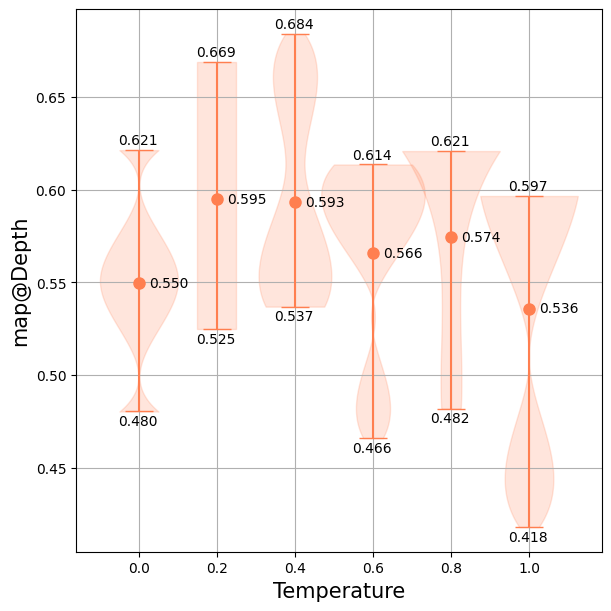

In [31]:
fig, axs = plt.subplots(1, 1, figsize=(6, 6), layout="constrained")
for i, temp in enumerate(temps):
    axs.annotate(str(f"{avg[temp]:.{3}f}"),
                     xy=(temp, avg[temp]),
                     xytext=(7,-3),
                     textcoords='offset points')
    axs.annotate(str(f"{avg[temp]-yerrslow[temp]:.{3}f}"),
                 xy=(temp, avg[temp]-yerrslow[temp]),
                 xytext=(-15,-10),
                 textcoords='offset points')
    axs.annotate(str(f"{avg[temp]+yerrsup[temp]:.{3}f}"),
                 xy=(temp, avg[temp]+yerrsup[temp]),
                 xytext=(-15,4),
                 textcoords='offset points')
    val_range = np.linspace(min(results[temp]), max(results[temp]), num=5)
    density, edges = np.histogram(results[temp], density=True, bins=5, range=(min(results[temp]), max(results[temp])))
    density = density/np.sum(density)
    xnew = np.linspace(val_range.min(), val_range.max(), 300) 
    spl = make_interp_spline(val_range, density, k=3)  # type: BSpline
    density = spl(xnew)

    
    density_l = temp - density/4.0
    density_r = temp  + density/4.0
    # print(density_l, density_r)
    # y_values = np.arange(
    # axs.fill_betweenx(sorted(values[llm_name][xticks[i]]), density_l, density_r, color=llm_stats[llm_name]["color"], alpha=0.2)
    axs.fill_betweenx(xnew, density_l, density_r, color=colour, alpha=0.2)

    # print(values[llm_name])
    axs.errorbar(temp,
                 avg[temp],
                 yerr=[[yerrslow[temp]], [yerrsup[temp]]],
                 fmt='o', markersize=8, capsize=10, color=colour)
axs.grid('on')
axs.set_xlabel("Temperature", fontsize=15)
axs.set_ylabel("map@Depth", fontsize=15)
plt.savefig(f"/home/upal/Projects/onto-pop-temp-var-exp/notes/assets/{llm_name}-{ont}-temp-var.pdf", format="pdf")

# Together

In [2]:
ontologies = [("case-uco-owl-trafficking", 8, "CASE", "coral"),
              ("wines-ontology", 4, "Wines", "blueviolet")]

In [3]:
results = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: list())))

In [4]:
for llm in ["gpt-4o", "llama3-8B"]:
    for ont, depth, _, _ in ontologies:
        
    

SyntaxError: incomplete input (2683956727.py, line 4)

# Plotting both LLMs together

In [4]:
ontologies = [("case-uco-owl-trafficking", 8, "CASE", "coral"),
              ("wines-ontology", 4, "Wines", "blueviolet")]

In [5]:
temps = ["t0.0", "t0.2","t0.4", "t0.6", "t0.8", "t1.0"]
ind = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

In [6]:
results = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: list())))

In [7]:
for ont, depth, _, _ in ontologies:
    for llm_name in ["gpt-4o", "llama3-8B"]:
        for temp in temps:
            for run in os.scandir(f"/home/upal/Projects/onto-pop-temp-var-exp/code/results/{llm_name}/{ont}/{temp}/runs"):
                with open(os.path.join(run, "pred_metrics.json"), "r") as f:
                    preds = json.load(f)
                    results[ont][llm_name][temp].append(preds[f"map_{depth}"])
        

In [8]:
results

defaultdict(<function __main__.<lambda>()>,
            {'case-uco-owl-trafficking': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'gpt-4o': defaultdict(<function __main__.<lambda>.<locals>.<lambda>.<locals>.<lambda>()>,
                                      {'t0.0': [0.7963145727040817,
                                        0.7825018158304988,
                                        0.8025870269982993,
                                        0.7964264012896826,
                                        0.7929750389739229,
                                        0.7895615987280329,
                                        0.8032747395833333,
                                        0.7921892715419501,
                                        0.787693197721797,
                                        0.7929496616354875,
                                        0.8028462035856009],
                                       't0.2': [0.7662732071995465,
 

In [16]:
ontology = "case-uco-owl-trafficking"

In [17]:
avg = defaultdict(list)
yerrslow = defaultdict(list)
yerrsup = defaultdict(list)

In [18]:
for llm_name in ["gpt-4o", "llama3-8B"]:
    avg[llm_name] = {k: mean(v) for k, v in results[ontology][llm_name].items()}
    yerrslow[llm_name] = {k: mean(v) - min(v) for k,v in results[ontology][llm_name].items()}
    yerrsup[llm_name] = {k: max(v) - mean(v) for k,v in results[ontology][llm_name].items()}

In [19]:
avg

defaultdict(list,
            {'gpt-4o': {'t0.0': 0.7944835935084261,
              't0.2': 0.7692700516404478,
              't0.4': 0.777720100800737,
              't0.6': 0.7291561891032454,
              't0.8': 0.6978697949883078,
              't1.0': 0.5781169073749292},
             'llama3-8B': {'t0.0': 0.5796978856646825,
              't0.2': 0.594959933257157,
              't0.4': 0.5933982227005385,
              't0.6': 0.5659131756218112,
              't0.8': 0.5744105072367488,
              't1.0': 0.5358764748086735}})

In [20]:
lines = {'linestyle': 'None'}
plt.rc('lines', **lines)

In [21]:
llm_stats = {
    "llama3-8B": {
        "name": "Llama3-8B",
        "color": "deepskyblue",
        "offset": +0.02,
    },
    "gpt-4o": {
        "name": "GPT-4o",
        "color": "teal",
        "offset": -0.02,
    },
}

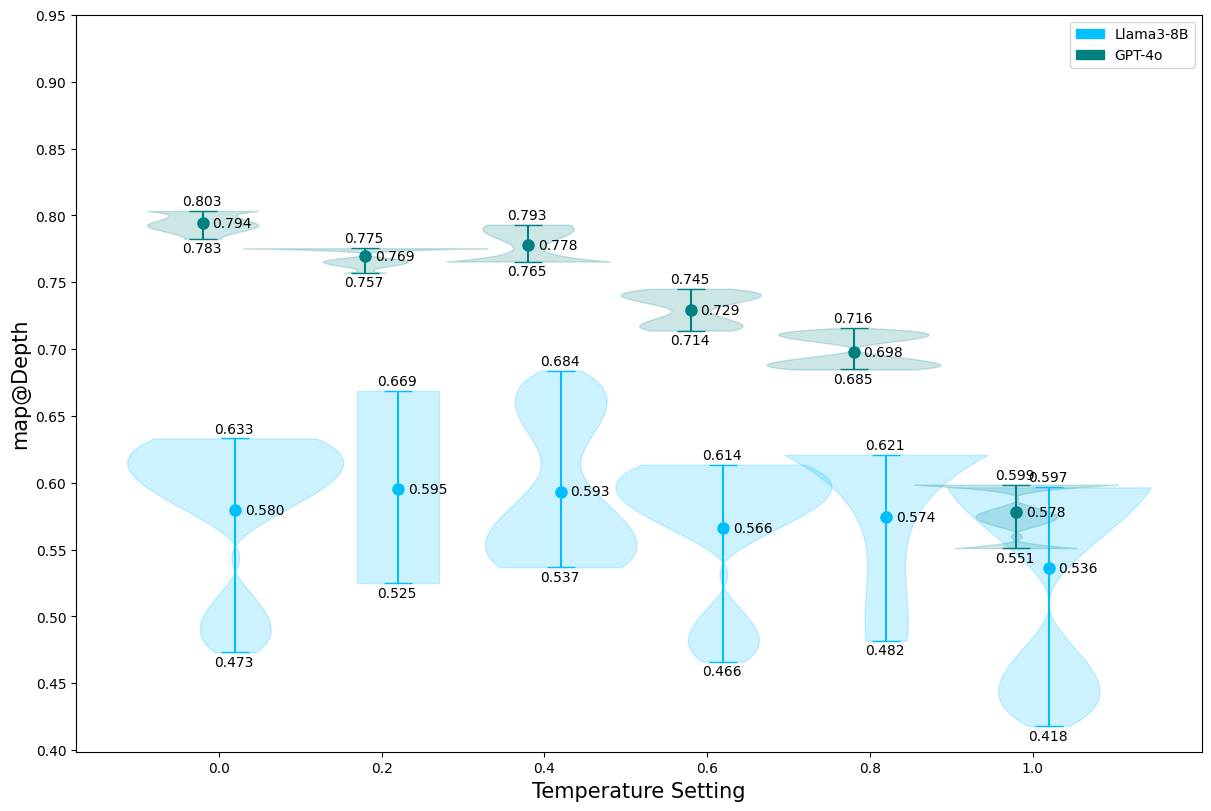

In [22]:
fig, axs = plt.subplots(1, 1, figsize=(12, 8), layout="constrained")
for i, temp in enumerate(temps):
    for llm_name in ["gpt-4o", "llama3-8B"]:
    # # Annotate the data value
        axs.annotate(str(f"{avg[llm_name][temp]:.{3}f}"),
                     xy=(ind[i]+llm_stats[llm_name]["offset"], avg[llm_name][temp]),
                     xytext=(7,-3),
                     textcoords='offset points')
        axs.annotate(str(f"{avg[llm_name][temp]-yerrslow[llm_name][temp]:.{3}f}"),
                     xy=(ind[i]+llm_stats[llm_name]["offset"], avg[llm_name][temp]-yerrslow[llm_name][temp]),
                     xytext=(-15,-10),
                     textcoords='offset points')
        axs.annotate(str(f"{avg[llm_name][temp]+yerrsup[llm_name][temp]:.{3}f}"),
                     xy=(ind[i]+llm_stats[llm_name]["offset"], avg[llm_name][temp]+yerrsup[llm_name][temp]),
                     xytext=(-15,4),
                     textcoords='offset points')
        val_range = np.linspace(min(results[ontology][llm_name][temp]), max(results[ontology][llm_name][temp]), num=5)
        density, edges = np.histogram(results[ontology][llm_name][temp], density=True, bins=5, range=(min(results[ontology][llm_name][temp]), max(results[ontology][llm_name][temp])))
        density = density/np.sum(density)
        xnew = np.linspace(val_range.min(), val_range.max(), 300) 
        spl = make_interp_spline(val_range, density, k=3)  # type: BSpline
        density = spl(xnew)

        
        density_l = ind[i] + llm_stats[llm_name]["offset"] - density/4.0
        density_r = ind[i] + llm_stats[llm_name]["offset"]  + density/4.0
        # print(density_l, density_r)
        # y_values = np.arange(
        # axs.fill_betweenx(sorted(values[llm_name][xticks[i]]), density_l, density_r, color=llm_stats[llm_name]["color"], alpha=0.2)
        axs.fill_betweenx(xnew, density_l, density_r, color=llm_stats[llm_name]["color"], alpha=0.2)

        # print(values[llm_name])
        axs.errorbar(ind[i]+llm_stats[llm_name]["offset"],
                     avg[llm_name][temp],
                     yerr=[[yerrslow[llm_name][temp]], [yerrsup[llm_name][temp]]],
                     fmt='o', markersize=8, capsize=10, color=llm_stats[llm_name]["color"])

# axs.grid('on')
axs.set_xticks(ind)
axs.set_xlabel("Temperature Setting", fontsize=15)
axs.set_ylabel("map@Depth", fontsize=15)
axs.legend(handles=[mpatches.Patch(color=v["color"], label=v["name"]) for k, v in llm_stats.items()], loc="upper right")
axs.set_yticks(np.arange(0.40, 1.0, step=0.05))
# plt.savefig(f"/home/upal/Projects/onto-pop-temp-var-exp/notes/assets/{ontology}-onto-pop-temp-var-exp.pdf", format="pdf")